# PRODUCTION DEFECTS DATA ANALYSIS

# ***About Dataset***

# Problem Statement

### The goal is to analyze the manufacturing defects dataset to gain insights into defect patterns, repair costs, and inspection methods. The analysis will help improve product quality, reduce repair costs, optimize inspection processes, and support predictive maintenance.

# Use Cases

Questions to Explore

1.	What are the most frequent defect types and their associated repair costs?

2.	Which severity level incurs the highest average repair cost?

3.	Are there any patterns in defect occurrences by location (e.g., Surface vs. Component)?

4.	How does repair cost vary across inspection methods?

5.	Are there specific months with a higher frequency of defects?

6.	What is the distribution of defects across severity levels for each product?

7.	Which products (product_id) have the highest defect rates?


# Let's Start

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [9]:
os.getcwd()

'C:\\Users\\Sabby\\RESUME PROJECTS'

In [10]:
# Read dataset
file = "defects_data.csv"
df = pd.read_csv(file)

In [11]:
# Get top 5 records
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [12]:
# Get shape of dataset
df.shape

(1000, 8)

In [13]:
# Get all the columns in as columns
columns = df.columns
columns

Index(['defect_id', 'product_id', 'defect_type', 'defect_date',
       'defect_location', 'severity', 'inspection_method', 'repair_cost'],
      dtype='object')

In [14]:
# Get information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [15]:
# Correct the defect_date datatype to datetime..
df["defect_date"] = pd.to_datetime(df["defect_date"])

In [16]:
df['defect_month'] = pd.to_datetime(df['defect_date']).dt.month_name()

In [17]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost,defect_month
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47,June
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87,April
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81,February
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47,March
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64,April


In [18]:
# Check for null values..
df.isnull().sum()

defect_id            0
product_id           0
defect_type          0
defect_date          0
defect_location      0
severity             0
inspection_method    0
repair_cost          0
defect_month         0
dtype: int64

In [19]:
# Check for Duplicates..
df.duplicated().sum()

0

# Descriptive Analysis..

In [21]:
round(df.describe(include=['int64','float64']),2)

,defect_id,product_id,repair_cost
count,1000.00,1000.00,1000.00
mean,500.50,50.84,507.63
std,288.82,29.48,289.62
min,1.00,1.00,10.22
25%,250.75,26.00,270.90
50%,500.50,51.00,506.43
75%,750.25,77.00,759.06
max,1000.00,100.00,999.64


In [22]:
round(df.describe(exclude=["int64","float64","datetime64"]),2)

,defect_type,defect_location,severity,inspection_method,defect_month
count,1000,1000,1000,1000,1000
unique,3,3,3,3,6
top,Structural,Surface,Minor,Manual Testing,January
freq,352,353,358,352,191


In [23]:
# Differntiate between numerical and object columns..
object_columns = df.select_dtypes(include="object").columns
numerical_columns = df.select_dtypes(include=["int64","float"]).columns
print(f" object columns : \n {object_columns}")
print(f" numerical columns : \n {numerical_columns}")

 object columns : 
 Index(['defect_type', 'defect_location', 'severity', 'inspection_method',
       'defect_month'],
      dtype='object')
 numerical columns : 
 Index(['defect_id', 'product_id', 'repair_cost'], dtype='object')


In [24]:
df.nunique()

defect_id            1000
product_id            100
defect_type             3
defect_date           182
defect_location         3
severity                3
inspection_method       3
repair_cost           996
defect_month            6
dtype: int64

In [25]:
# Classify all these columns into categorical, non-categorical, continuous and discret ..
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for col in df.columns:
        if df[col].dtype == "object":
            if df[col].nunique() < 10:
                categorical_features.append(col)

            else:
                non_categorical_features.append(col)

        elif df[col].dtype in ["int64","float64"]:
            if df[col].nunique() < 10 :
                discrete_features.append(col)
            else:
                continuous_features.append(col)
    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [26]:
categorical_features, non_categorical_features, discrete_features, continuous_features = classify_features(df)

In [27]:
print("categorical_features :", categorical_features)
print("non_categorical_features :", non_categorical_features)
print("discrete_features :", discrete_features)
print("continuous_features :", continuous_features)

categorical_features : ['defect_type', 'defect_location', 'severity', 'inspection_method', 'defect_month']
non_categorical_features : []
discrete_features : []
continuous_features : ['defect_id', 'product_id', 'repair_cost']


# Defect Analysis

In [29]:
# Occurances of the top 10 product_id..
top_10_products = df.groupby(["product_id"]).size().nlargest(10).reset_index(name="count")
top_10_products

,product_id,count
0,63,20
1,81,20
2,97,19
3,56,18
4,4,16
5,10,16
6,92,16
7,6,15
8,45,15
9,74,15


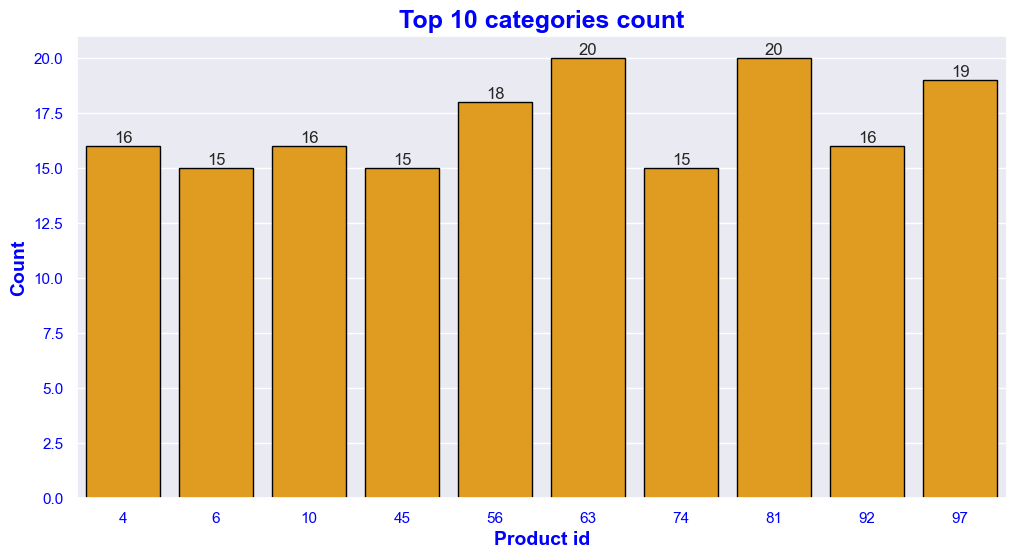

In [30]:
# Visualisation
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10_products, x="product_id", y="count", color="orange", edgecolor="black")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Top 10 categories count", color="blue", fontweight="bold",fontsize=18)
plt.xlabel("Product id", color="blue", fontweight="bold",fontsize=14)
plt.xticks(color="blue",fontsize=11)
plt.ylabel("Count", color="blue", fontweight="bold",fontsize=14)
plt.yticks(color="blue",fontsize=11)
plt.show()

In [31]:
# Identify 'defect_type', 'defect_location', 'severity', 'inspection_method' their occurrences.
for i in categorical_features:
    value_counts = df[i].value_counts().reset_index()
    value_counts.columns = [i, 'Count']   
    print(value_counts)
    print("-"*50)

  defect_type  Count
0  Structural    352
1  Functional    339
2    Cosmetic    309
--------------------------------------------------
  defect_location  Count
0         Surface    353
1       Component    326
2        Internal    321
--------------------------------------------------
   severity  Count
0     Minor    358
1  Critical    333
2  Moderate    309
--------------------------------------------------
   inspection_method  Count
0     Manual Testing    352
1  Visual Inspection    351
2  Automated Testing    297
--------------------------------------------------
  defect_month  Count
0      January    191
1        March    175
2          May    167
3     February    160
4        April    156
5         June    151
--------------------------------------------------


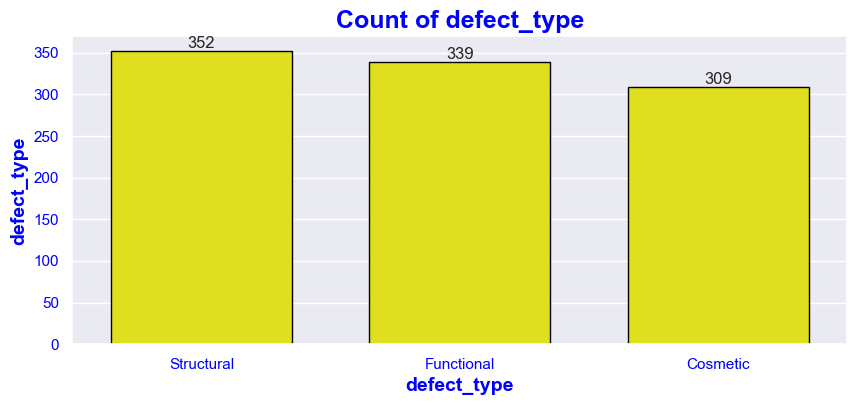

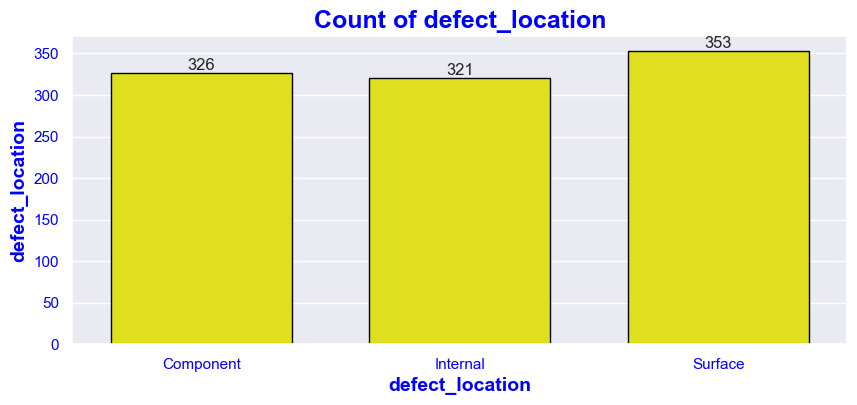

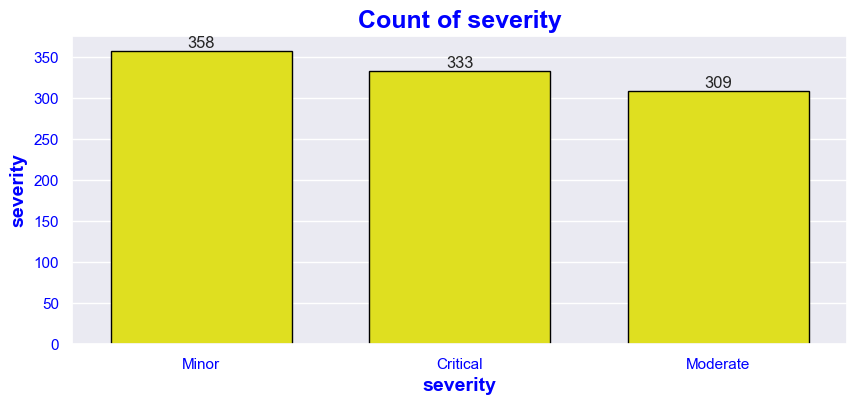

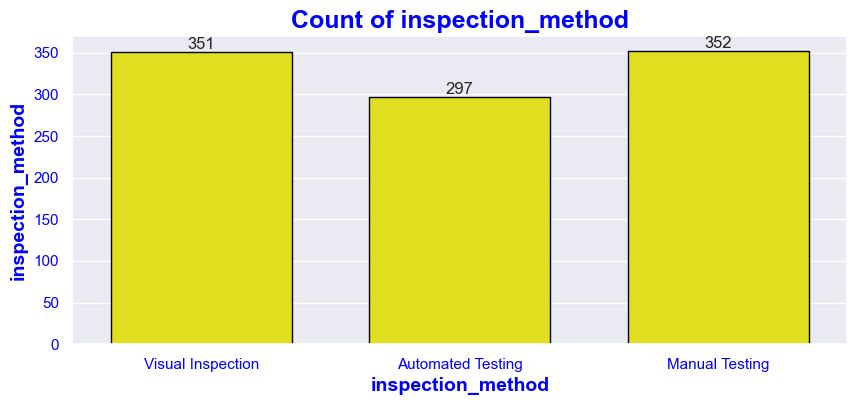

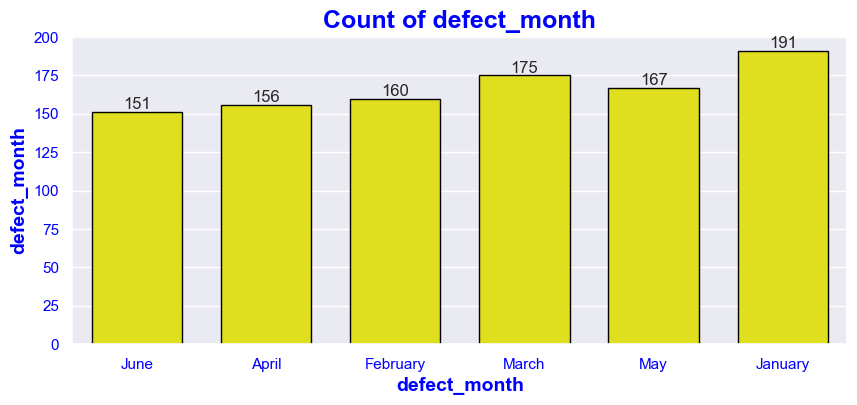

In [46]:
# visualisation..
for feature in categorical_features:
    plt.figure(figsize=(10,4))
    ax = sns.countplot(data=df, x=feature, color="yellow", width=0.7, edgecolor="black")
    for container in ax.containers:
         ax.bar_label(container)
    plt.title(f"Count of {feature}", color="blue", fontweight="bold",fontsize=18)
    plt.xlabel(feature, color="blue", fontweight="bold",fontsize=14)
    plt.xticks(color="blue",fontsize=11)
    plt.ylabel(feature, color="blue", fontweight="bold",fontsize=14)
    plt.yticks(color="blue",fontsize=11)
    plt.show()

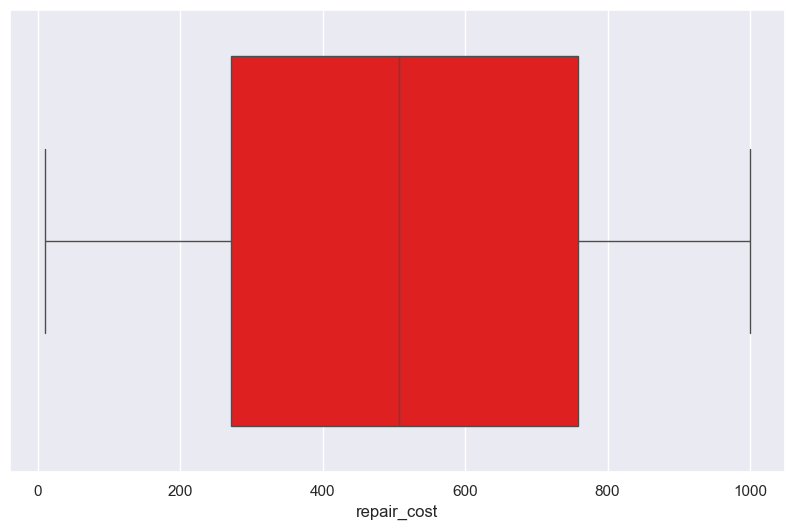

In [48]:
# Check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="repair_cost", color="red")
plt.show()

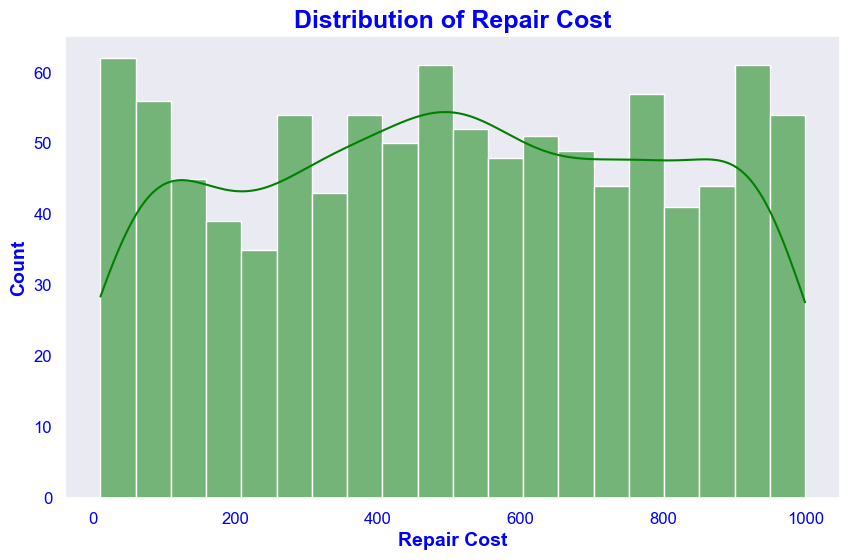

In [52]:
# Distribution of repair cost..
plt.figure(figsize=(10, 6))
sns.set_style("dark")
ax = sns.histplot(data=df, x="repair_cost", bins=20, color="green", kde=True)
plt.title("Distribution of Repair Cost", fontsize=18, color="blue", fontweight="bold")
plt.xlabel("Repair Cost", color="blue", fontsize=14, fontweight="bold")
plt.xticks(color="blue", fontsize=12)
plt.ylabel("Count", color="blue", fontsize=14, fontweight="bold")
plt.yticks(color="blue", fontsize=12)
plt.show()

The histogram suggests that repair costs are distributed relatively evenly across the range of values (approximately 0 to 1000).
There isn't a strong skew in the distribution; it appears roughly uniform, though there may be slight peaks at specific intervals.

In [54]:
# check for the skewness
from scipy.stats import skew
print("Skewness in repair cost:",df["repair_cost"].skew())

Skewness in repair cost: -0.029278529629238034


The repair costs are fairly evenly distributed around the central value, with no strong tendency toward very high or very low costs.
Since the skewness is minimal, the mean and median of the repair costs will likely be close to each other.

There are no outliers in the repair cost

In [56]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost,defect_month
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47,June
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87,April
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81,February
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47,March
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64,April


In [58]:
# Analyze Distribution of the defect types bydefect location.
type_by_location = pd.crosstab(df["defect_type"],df["defect_location"])
type_by_location

defect_location,Component,Internal,Surface
defect_type,,,
Cosmetic,97,95,117
Functional,117,116,106
Structural,112,110,130


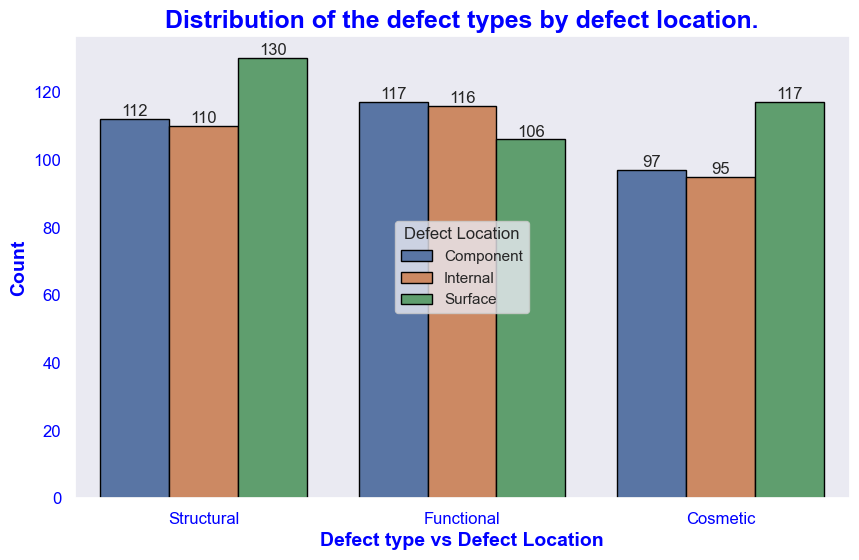

In [60]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="defect_type", hue="defect_location", edgecolor="black")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of the defect types by defect location.", fontsize=18, color="blue", fontweight="bold")
plt.xlabel("Defect type vs Defect Location", fontsize=14, color="blue", fontweight="bold")
plt.xticks(color="blue", fontsize=12)
plt.yticks(color="blue", fontsize=12)
plt.ylabel("Count",fontsize=14, color="blue", fontweight="bold")
plt.legend(title="Defect Location",loc="center")
plt.show()

In [62]:
# Distribution of the defect types based on severity.
type_by_location = pd.crosstab(df["defect_type"],df["severity"])
type_by_location

severity,Critical,Minor,Moderate
defect_type,,,
Cosmetic,107,106,96
Functional,114,113,112
Structural,112,139,101


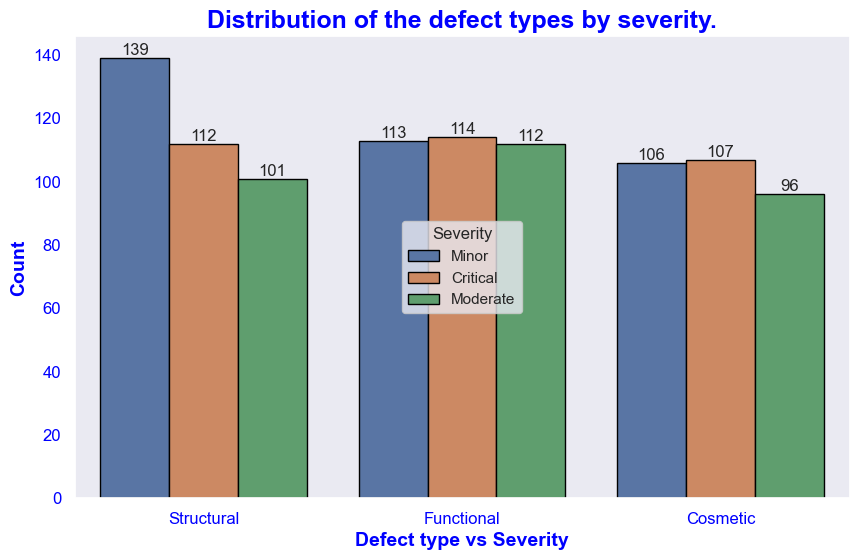

In [64]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="defect_type", hue="severity", edgecolor="black")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of the defect types by severity.", fontsize=18, color="blue", fontweight="bold")
plt.xlabel("Defect type vs Severity", fontsize=14, color="blue", fontweight="bold")
plt.xticks(color="blue", fontsize=12)
plt.yticks(color="blue", fontsize=12)
plt.ylabel("Count",fontsize=14, color="blue", fontweight="bold")
plt.legend(title="Severity",loc="center")
plt.show()

In [66]:
# Analyze Distribution of the defect location by severity.
type_by_location = pd.crosstab(df["defect_location"],df["severity"])
type_by_location

severity,Critical,Minor,Moderate
defect_location,,,
Component,103,116,107
Internal,115,114,92
Surface,115,128,110


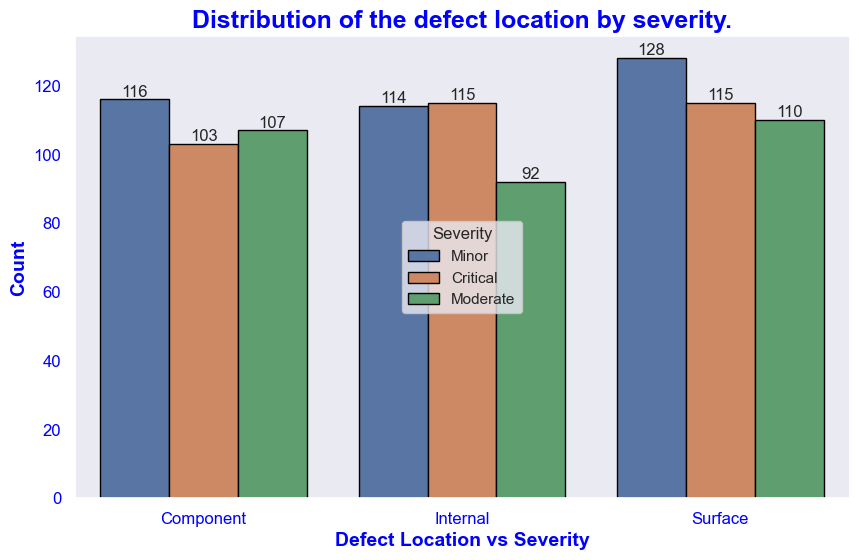

In [68]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="defect_location", hue="severity", edgecolor="black")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of the defect location by severity.", fontsize=18, color="blue", fontweight="bold")
plt.xlabel("Defect Location vs Severity", fontsize=14, color="blue", fontweight="bold")
plt.xticks(color="blue", fontsize=12)
plt.yticks(color="blue", fontsize=12)
plt.ylabel("Count",fontsize=14, color="blue", fontweight="bold")
plt.legend(title="Severity",loc="center")
plt.show()

In [70]:
# Analyse distribution of defect type by months.
monthly_defects = pd.crosstab(df["defect_type"],df["defect_month"])
monthly_defects

defect_month,April,February,January,June,March,May
defect_type,,,,,,
Cosmetic,49,47,65,45,46,57
Functional,52,55,56,43,67,66
Structural,55,58,70,63,62,44


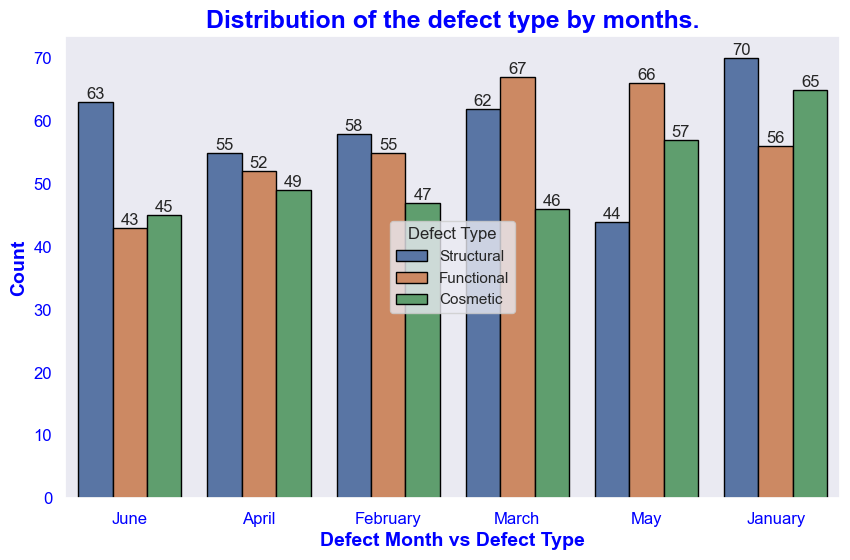

In [72]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="defect_month", hue="defect_type", edgecolor="black")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of the defect type by months.", fontsize=18, color="blue", fontweight="bold")
plt.xlabel("Defect Month vs Defect Type", fontsize=14, color="blue", fontweight="bold")
plt.xticks(color="blue", fontsize=12)
plt.yticks(color="blue", fontsize=12)
plt.ylabel("Count",fontsize=14, color="blue", fontweight="bold")
plt.legend(title="Defect Type",loc="center")
plt.show()

# Cost Optimization

## Evaluate repair costs for various defect types and methods.

In [74]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost,defect_month
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47,June
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87,April
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81,February
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47,March
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64,April


In [78]:
# Identify high-cost defects to optimize inspection and repair processes.
high_cost_defects = df.groupby(["defect_type"], as_index=False)["repair_cost"].mean().sort_values(by="repair_cost", ascending=False)
high_cost_defects


,defect_type,repair_cost
0,Cosmetic,513.908479
1,Functional,507.096106
2,Structural,502.624574


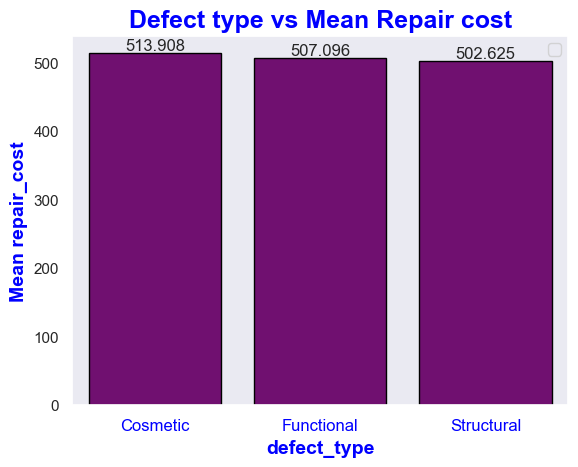

In [80]:
ax = sns.barplot(data=high_cost_defects, x='defect_type', y='repair_cost', color="purple", ci=None, edgecolor='black') 
for i in ax.containers:
    ax.bar_label(i)
plt.title('Defect type vs Mean Repair cost', fontweight='bold', fontsize=18, color="blue") 
plt.legend()
plt.xlabel('defect_type',fontweight='bold', fontsize=14, color="blue")
plt.xticks(fontsize=12, color="blue")          
plt.ylabel('Mean repair_cost', fontweight='bold', fontsize=14, color="blue")
plt.xticks(fontsize=12, color="blue")          
plt.show()

## How does repair cost vary across inspection methods?

In [82]:
repair_cost_method = df.groupby(["inspection_method"])["repair_cost"].sum().reset_index()
repair_cost_method

,inspection_method,repair_cost
0,Automated Testing,149035.88
1,Manual Testing,185178.29
2,Visual Inspection,173412.98


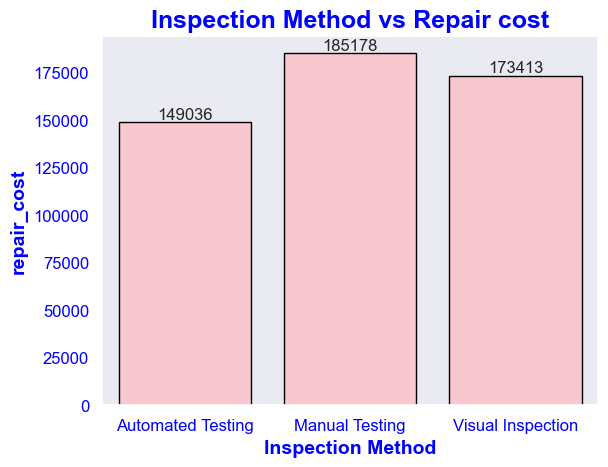

In [84]:
ax = sns.barplot(data=repair_cost_method, x='inspection_method', y='repair_cost',color="pink", ci=None, edgecolor='black') 
for i in ax.containers:
    ax.bar_label(i)
plt.title('Inspection Method vs Repair cost', fontweight='bold', fontsize=18, color="blue") 
plt.xlabel('Inspection Method',fontweight='bold', fontsize=14, color="blue")
plt.xticks(fontsize=12, color="blue")          
plt.ylabel('repair_cost', fontweight='bold', fontsize=14, color="blue")
plt.yticks(fontsize=12, color="blue")          
plt.show()

In [86]:
mean_repair_cost_pivot = pd.pivot_table(data=df, values="repair_cost", index=["defect_type","inspection_method"],
                             aggfunc={"repair_cost":"mean"}).reset_index()
mean_repair_cost_pivot

,defect_type,inspection_method,repair_cost
0,Cosmetic,Automated Testing,488.925914
1,Cosmetic,Manual Testing,530.964057
2,Cosmetic,Visual Inspection,518.594727
3,Functional,Automated Testing,517.162525
4,Functional,Manual Testing,531.984677
5,Functional,Visual Inspection,471.899914
6,Structural,Automated Testing,498.730286
7,Structural,Manual Testing,515.819672
8,Structural,Visual Inspection,493.017360


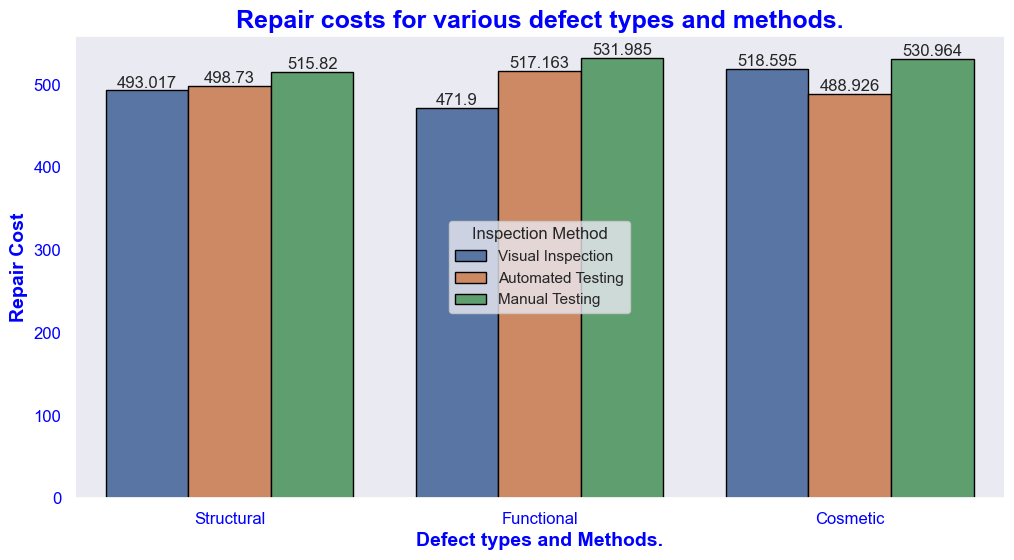

In [88]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df, x="defect_type", y="repair_cost",  ci=None, hue="inspection_method", edgecolor="black")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Repair costs for various defect types and methods.",fontsize=18, color="blue", fontweight="bold")
plt.xlabel("Defect types and Methods.",fontsize=14, color="blue", fontweight="bold")
plt.xticks(color="blue", fontsize=12)
plt.ylabel("Repair Cost",fontsize=14, color="blue", fontweight="bold")
plt.yticks(color="blue", fontsize=12)
plt.legend(title="Inspection Method",loc="center")
plt.show()

# Severity-Based Insights

## Track trends in defect severity over time.


In [90]:
df["severity"].value_counts()

severity
Minor       358
Critical    333
Moderate    309
Name: count, dtype: int64

In [94]:
severity_counts = df.groupby(['defect_date', 'severity']).size().reset_index(name='count')
print(severity_counts)
pivoted_data = severity_counts.pivot(index='defect_date', columns='severity', values='count').fillna(0)
print(pivoted_data)

    defect_date  severity  count
0    2024-01-01  Critical      2
1    2024-01-01     Minor      1
2    2024-01-01  Moderate      1
3    2024-01-02  Critical      7
4    2024-01-02     Minor      2
..          ...       ...    ...
458  2024-06-29     Minor      1
459  2024-06-29  Moderate      2
460  2024-06-30  Critical      1
461  2024-06-30     Minor      1
462  2024-06-30  Moderate      2

[463 rows x 3 columns]
severity     Critical  Minor  Moderate
defect_date                           
2024-01-01        2.0    1.0       1.0
2024-01-02        7.0    2.0       2.0
2024-01-03        4.0    0.0       3.0
2024-01-04        5.0    0.0       1.0
2024-01-05        5.0    1.0       0.0
...               ...    ...       ...
2024-06-26        1.0    3.0       2.0
2024-06-27        0.0    1.0       0.0
2024-06-28        1.0    0.0       0.0
2024-06-29        1.0    1.0       2.0
2024-06-30        1.0    1.0       2.0

[182 rows x 3 columns]


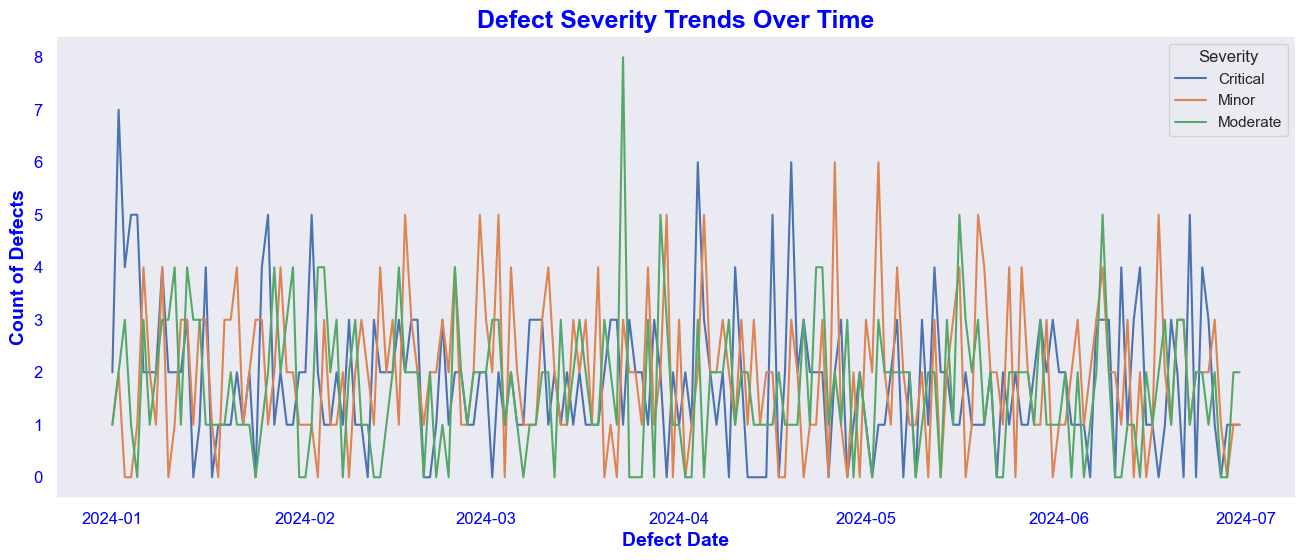

In [96]:
plt.figure(figsize=(16, 6))
for severity in pivoted_data.columns:
    sns.lineplot(data=pivoted_data, x=pivoted_data.index, y=severity, label=severity)
plt.title("Defect Severity Trends Over Time",fontsize=18, color="blue", fontweight="bold")
plt.xlabel("Defect Date",fontsize=14, color="blue", fontweight="bold")
plt.xticks(color="blue", fontsize=12)
plt.ylabel("Count of Defects",fontsize=14, color="blue", fontweight="bold")
plt.yticks(color="blue", fontsize=12)
plt.legend(title="Severity")
plt.show()

# INSIGHTS FOUND

# Suggestions Based on Findings

## Most Frequent Defect Types and Associated Repair Costs

### Structural defects: 
These are the most common but have lower repair costs. 

### Focus on:

Process Improvements: Streamline production processes to reduce structural defects.

Preventive Maintenance: Regular equipment checks to minimize structural issues.

Cosmetic defects: Higher repair costs despite fewer occurrences. 

#### Suggestions:

Quality Assurance: Implement stricter cosmetic standards during final inspection.

Design Adjustments: Revise product designs to make cosmetic flaws less likely.

## Highest Repair Costs by Severity

### Critical defects have the highest average repair costs:

Root Cause Analysis: Investigate root causes for critical defects and address them at the design or production level.

Training Programs: Upskill employees to detect and resolve critical issues earlier in the production cycle.

Automated Monitoring: Use advanced inspection technologies to catch critical issues before escalation.

## Patterns in Defect Occurrences by Location

### Surface defects are the most frequent:

Enhanced Surface Checks: Train inspectors to identify surface issues earlier.

Material Quality Improvement: Source higher-quality materials for surface components.

### Component defects show moderate occurrence:

Supplier Evaluation: Work with component suppliers to ensure consistent quality.

### Internal defects, though less frequent, incur higher costs:

Advanced Testing: Use automated and non-destructive testing (NDT) for internal components.

Design Reviews: Regularly review designs to reduce internal issues.

## Repair Costs Across Inspection Methods

### Automated Testing is the most cost-efficient:

Expand Automation: Invest in automated testing to increase efficiency and reduce manual errors.

Combine Methods: Use automated testing alongside visual inspections for better coverage.

### Manual Testing is the least efficient:

Optimize Manual Inspections: Limit manual testing to specific defect types requiring human judgment.

## Seasonal Trends in Defect Frequency

### High defect counts in January and March:

Production Scheduling: Avoid overloading production lines in January to maintain quality.

Staffing Adjustments: Increase staff availability during high-demand months.

### Lower defect counts in June:

Use this period for process reviews and training sessions to improve quality in busier months.

## Defect Distribution Across Severity Levels for Products

### Products like 63, 81, and 97 have high defect rates:

Product-Specific Analysis: Conduct detailed analysis for these products to identify root causes.

Design Refinement: Review designs for products with high critical defect rates (e.g., Product 4).

## Products with the Highest Defect Rates

### Focus on High-Defect Products:

Products 63 and 81 should be prioritized for improvements.

Use Failure Mode and Effects Analysis (FMEA) to address recurring issues.

## General Recommendations

### Invest in Quality Control:

Enhance inspection methods and use data-driven quality improvement strategies.

### Supplier Collaboration:

Work closely with suppliers to improve raw material and component quality.

### Data Analytics:
Leverage historical data to predict and mitigate potential defects.

### Employee Training:

Regularly train employees on identifying and addressing quality issues.

### Continuous Improvement:
Establish a cross-functional team to monitor and implement ongoing quality improvements.